In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
import sys, os
import glob
sys.path.append('../')

from rankutils.cfgloader import cfgloader
from rankutils.rIO import read_rank
from rankutils.drawing import colors_from_cmap

import matplotlib.pyplot as plt
%matplotlib notebook

import mpld3

import numpy as np
import pandas

In [4]:
data = read_rank('/home/alberto/phD/projects/performance_prediction/ret-mr-learning/input-ranks/rank.v2/places365/001.vgg16-L2/00036_alcove_00000724.jpg.rk')

data_ = data['score'][1:100]

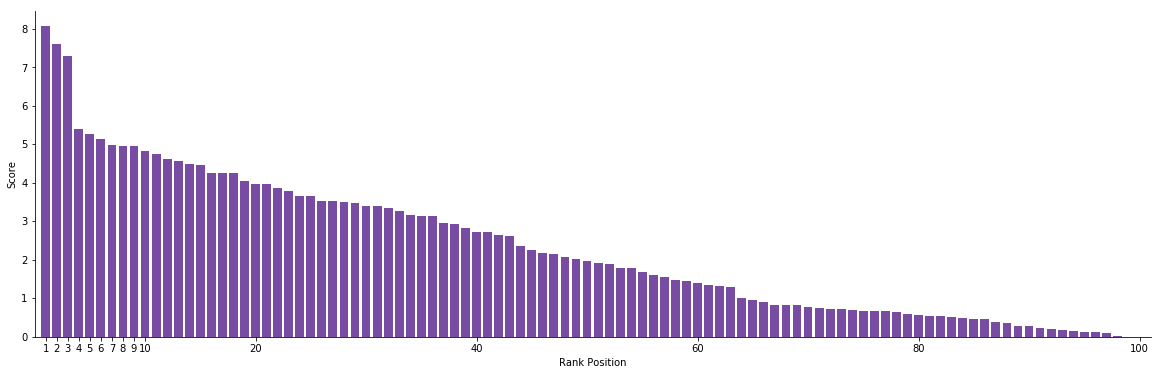

In [5]:
fig, ax = plt.subplots(1, sharey=True, sharex=True)
fig.set_size_inches((20, 6))

x = np.arange(1, data_.size+1)
y = np.max(data_) - data_
c = "#6c5ce7"

ax.bar(x, y, color=c, alpha=0.7)

ax.set_xlim(left=0.0, right=101)
ax.set_xticks([x for x in range(1, 11)] + [x for x in range(20, 101, 20)])
ax.set_xlabel('Rank Position')

ax.set_ylabel('Score')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.savefig('/home/alberto/phD/projects/performance_prediction/ret-mr-learning/misc./mm_retrieval_28-05-2019_raw_rank.png')


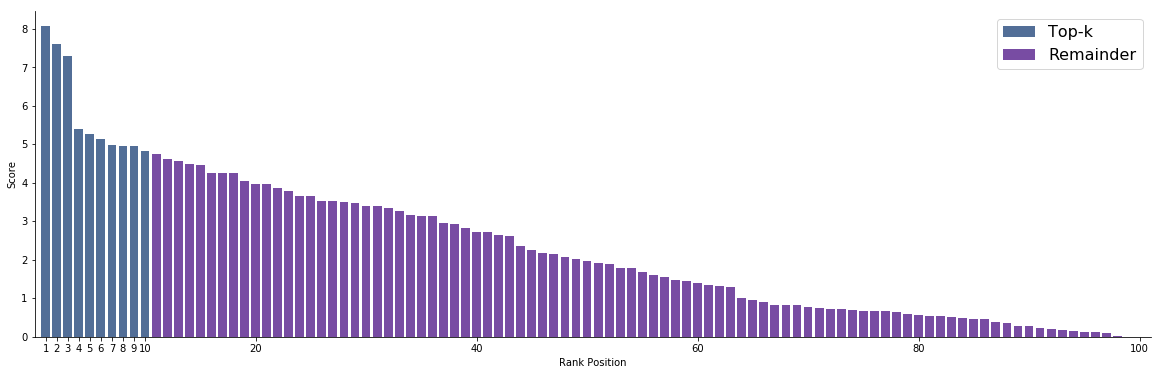

In [6]:
fig, ax = plt.subplots(1, sharey=True, sharex=True)
fig.set_size_inches((20, 6))

x = np.arange(1, data_.size+1)
y = np.max(data_) - data_

ctop = "#74b9ff"
c = "#6c5ce7"

ax.bar(x[0:10], y[0:10], color=ctop, alpha=0.7, label='Top-k')
ax.bar(x[10:], y[10:], color=c, alpha=0.7, label='Remainder')

ax.set_xlim(left=0.0, right=101)
ax.set_xticks([x for x in range(1, 11)] + [x for x in range(20, 101, 20)])
ax.set_xlabel('Rank Position')

ax.set_ylabel('Score')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(fontsize=16)

#plt.savefig('/home/alberto/phD/projects/performance_prediction/ret-mr-learning/misc./mm_retrieval_28-05-2019_topk_rank.png')

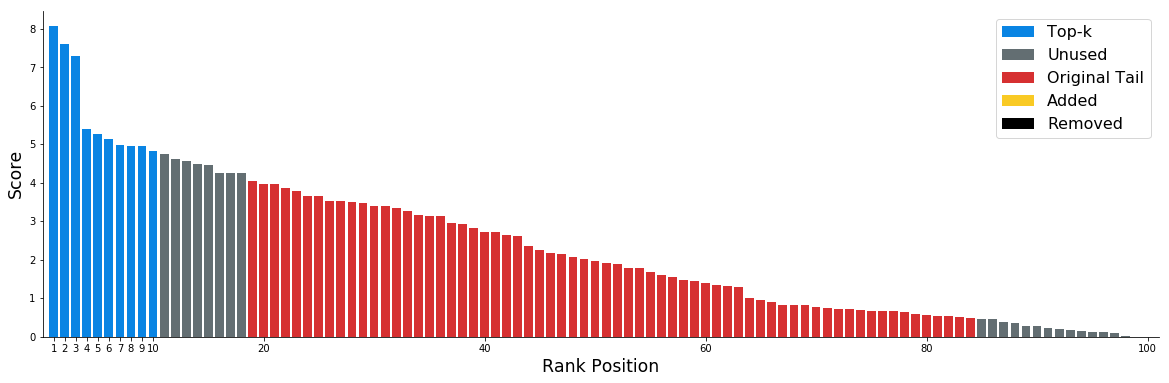

In [27]:
fig, ax = plt.subplots(1, sharey=True, sharex=True)
fig.set_size_inches((20, 6))

x = np.arange(1, data_.size+1)
y = np.max(data_) - data_

i = 18
j = 83

ctop = "#0984e3"
camb = "#636e72"
c = "#d63031"
cnoise = "#b2bec3"

ax.bar(x[0:10], y[0:10], color=ctop, alpha=1, label='Top-k')
ax.bar(x[10:i], y[10:i], color=camb, alpha=1, label='Unused')
ax.bar(x[i:j+1], y[i:j+1], color=c, alpha=1, label='Original Tail')
ax.bar(x[j+1], y[j+1], color="#f9ca24", alpha=1, label='Added')
ax.bar(x[j+1], y[j+1], color="black", alpha=1, label='Removed')
ax.bar(x[j+1:], y[j+1:], color=camb, alpha=1)

ax.set_xlim(left=0.0, right=101)
ax.set_xticks([x for x in range(1, 11)] + [x for x in range(20, 101, 20)])
ax.set_xlabel('Rank Position', **dict(fontsize='xx-large'))

ax.set_ylabel('Score', **dict(fontsize='xx-large'))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(fontsize=16)

plt.savefig('/home/alberto/phD/thesis/figs/tail/pert.svg')

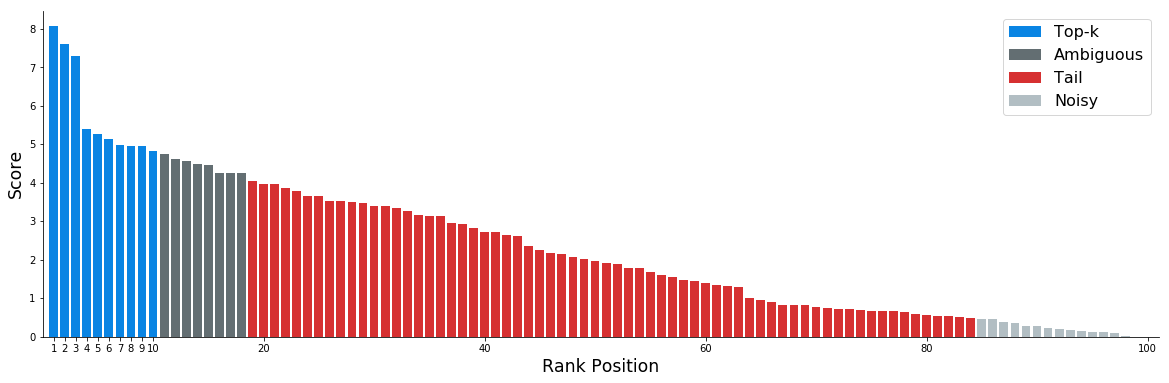

In [22]:
fig, ax = plt.subplots(1, sharey=True, sharex=True)
fig.set_size_inches((20, 6))

x = np.arange(1, data_.size+1)
y = np.max(data_) - data_

i = 18
j = 83

ctop = "#0984e3"
camb = "#636e72"
c = "#d63031"
cnoise = "#b2bec3"

ax.bar(x[0:10], y[0:10], color=ctop, alpha=1, label='Top-k')
ax.bar(x[10:i], y[10:i], color=camb, alpha=1, label='Ambiguous')
ax.bar(x[i:j+1], y[i:j+1], color=c, alpha=1, label='Tail')
ax.bar(x[j+1:], y[j+1:], color=cnoise, alpha=1, label='Noisy')

ax.set_xlim(left=0.0, right=101)
ax.set_xticks([x for x in range(1, 11)] + [x for x in range(20, 101, 20)])
ax.set_xlabel('Rank Position', **dict(fontsize='xx-large'))

ax.set_ylabel('Score', **dict(fontsize='xx-large'))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(fontsize=16)

plt.savefig('/home/alberto/phD/thesis/figs/tail/tail_choice.svg')

In [9]:
import matlab.engine

matlab_engine = matlab.engine.start_matlab()

In [10]:
n = 10

wbl_dists = []
rng_list = []


x = np.linspace(0.001, 3, 1000)
xm = matlab.double(x.tolist())

shape = (6 - 1.5)*np.random.rand(n).astype(np.float32) + 1.5

for i in range(n):
    
    B = shape[i]
    
    vals = matlab_engine.wblpdf(xm, 1.0, float(B), nargout=1)
    rng = matlab_engine.wblrnd(1.0, float(B), 50, nargout=1)
    
    wbl_dists.append(dict(scale=A, shape=B, values=vals[0]))
    rng_list.append(rng[0])

rng_array = matlab.double(np.array(rng_list).reshape(-1).tolist())
mixt_estpar, _ = matlab_engine.wblfit(rng_array, nargout=2)
mixt_values = matlab_engine.wblpdf(xm, mixt_estpar[0][0], mixt_estpar[0][1], nargout=1)[0]
    
    
fig, ax = plt.subplots(1, sharey=True, sharex=True)
fig.set_size_inches((12, 6))

for wbl in wbl_dists:
    
    ax.plot(x, wbl['values'], '--', linewidth=2)
    
ax.plot(x, mixt_values, color='black', linewidth=4, label="Weibull Mixture")
    
    
ax.set_ylim(bottom = 0.0)
ax.set_xlim(left = 0.0)

ax.set_yticks([])
ax.set_xticks([])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend()

plt.savefig('/home/alberto/phD/projects/performance_prediction/ret-mr-learning/misc./mm_retrieval_28-05-2019_wbl_mixt.png')

NameError: name 'A' is not defined